# Basic Import

In [1]:
 import numpy as np
 import cv2   #converts image into arrays
 import os 
 import random 
 import matplotlib.pyplot as plt
 import pickle
 import warnings
 warnings.filterwarnings('ignore')
 import tensorflow as tf

# Drive mount

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Keras packages

In [3]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.models import Sequential
from glob import glob

# Getting data

In [4]:
data = '/content/drive/MyDrive/Data/'
data

'/content/drive/MyDrive/Data/'

In [5]:
categories=glob('/content/drive/MyDrive/Data/*')
categories


['/content/drive/MyDrive/Data/Leaf smut-20200814T055530Z-001',
 '/content/drive/MyDrive/Data/Bacterial leaf blight-20200814T055237Z-001',
 '/content/drive/MyDrive/Data/Brown spot-20200814T055208Z-001']

In [6]:
for category in categories:
  folder=os.path.join(data,category)
  for img in os.listdir(folder): #this list dir will list all the files that are present in the folder
       img_path=os.path.join(folder,img)
       print(img_path)
       break

/content/drive/MyDrive/Data/Leaf smut-20200814T055530Z-001/DSC_0308.JPG
/content/drive/MyDrive/Data/Bacterial leaf blight-20200814T055237Z-001/DSC_0377.JPG
/content/drive/MyDrive/Data/Brown spot-20200814T055208Z-001/DSC_0300.JPG


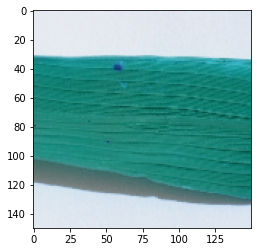

In [7]:
IMG_SIZE=150
for category in categories:
  folder=os.path.join(data,category)
  for img in os.listdir(folder): #this list dir will list all the files that are present in the folder
       img_path=os.path.join(folder,img)
       img_arr=cv2.imread(img_path)    
       img_arr=cv2.resize(img_arr,(IMG_SIZE,IMG_SIZE)) ##cv2 converts image into array
       plt.imshow(img_arr)

In [8]:
disease=[]
for category in categories:
  folder=os.path.join(data,category)
  label=categories.index(category)
  for img in os.listdir(folder): #this list dir will list all the files that are present in the folder
       img_path=os.path.join(folder,img)
       img_arr=cv2.imread(img_path)    #cv2 converts image into array
       img_arr=cv2.resize(img_arr,(IMG_SIZE,IMG_SIZE))
       disease.append([img_arr,label])

# Image in array format

In [9]:
disease

[[array([[[219, 228, 240],
          [221, 227, 238],
          [222, 228, 239],
          ...,
          [218, 225, 240],
          [214, 224, 241],
          [218, 225, 242]],
  
         [[220, 228, 240],
          [221, 227, 238],
          [223, 229, 240],
          ...,
          [217, 224, 239],
          [215, 223, 240],
          [217, 226, 240]],
  
         [[219, 227, 240],
          [220, 229, 239],
          [221, 231, 241],
          ...,
          [215, 224, 239],
          [212, 222, 240],
          [215, 225, 242]],
  
         ...,
  
         [[226, 233, 240],
          [224, 230, 241],
          [223, 230, 239],
          ...,
          [217, 224, 241],
          [216, 225, 241],
          [217, 225, 239]],
  
         [[226, 231, 240],
          [223, 230, 239],
          [224, 231, 240],
          ...,
          [219, 225, 239],
          [218, 226, 239],
          [216, 224, 241]],
  
         [[225, 230, 240],
          [224, 231, 240],
          [224, 232, 239

# Defining Features & Class

In [10]:
X=[]
y=[]
for features,labels in disease:
  X.append(features)
  y.append(labels)

# Converting Features img & Class into array 

In [11]:
X=np.array(X)
y=np.array(y)

In [12]:
X.shape

(119, 150, 150, 3)

# Creating CNN architecture

In [13]:
tf.random.set_seed(32)
from keras import Sequential
from keras.layers import Conv2D,Dense,MaxPool2D,Flatten,Activation,MaxPooling2D,Dropout,BatchNormalization
from keras.optimizers import SGD
model = Sequential()


model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(150,150,3),padding='valid',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(150,150,3),padding='valid',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(150,150,3),padding='valid',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dense(100,activation='relu')) # input node
model.add(Dense(100,activation='relu')) # hiddeen
model.add(Dropout(0.3))
model.add(Dense(3,activation='softmax')) #output node
  

# Model Summary

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 147, 147, 32)      1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 70, 70, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        16416     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0

# Model architecture figure

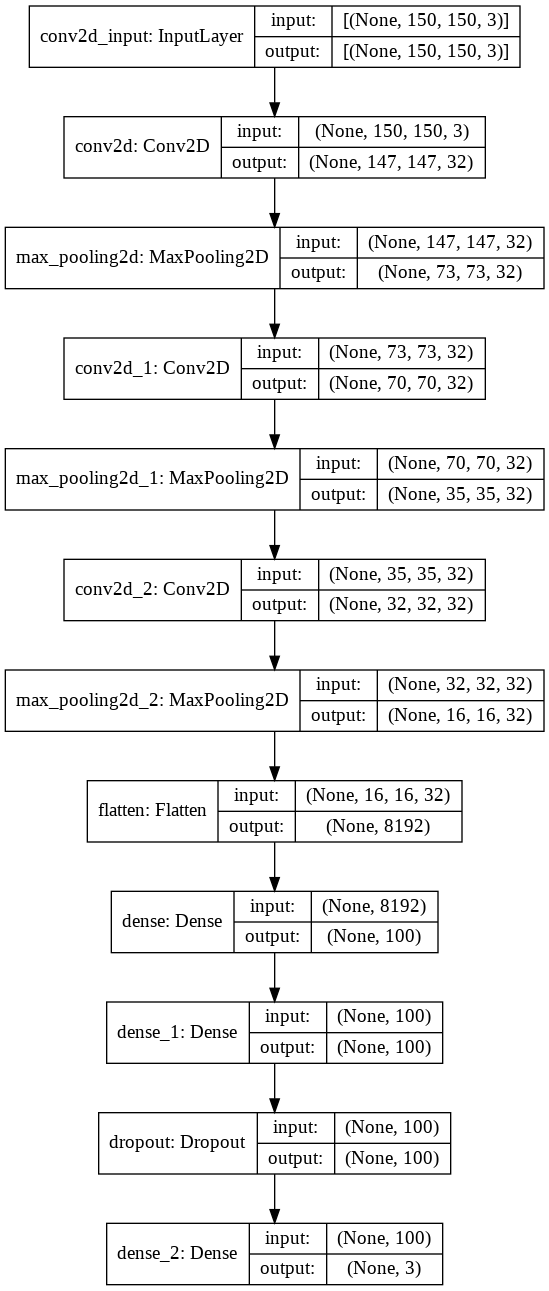

In [15]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='simple_cnn.png', show_shapes=True, show_layer_names=True)

# Optimizers

In [16]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy',
              optimizer= opt,
              metrics=['accuracy'])

# Callback 

In [17]:
import keras
callback= keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=10,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
) 

## Train test split

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=36)

In [19]:
X_train.shape

(95, 150, 150, 3)

In [20]:
X_train[0].shape

(150, 150, 3)

## Preprocessing Scale images

In [21]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

# Getting unique class

In [22]:
from tensorflow.keras.utils import to_categorical

In [23]:
y_train.shape

(95,)

In [24]:
y_train[0]

1

In [25]:
y_categorical_train = to_categorical(y_train,3)

In [26]:
y_categorical_train.shape

(95, 3)

In [27]:
np.argmax(y_categorical_train[12])

2

In [28]:
y_cat_test = to_categorical(y_test,3)

# Defining class labels

In [29]:
class_labels = ['Bacterial leaf blight','Brown spot','Leaf smut']

In [30]:
np.argmax(y_categorical_train[2])

1

# Plotting Images

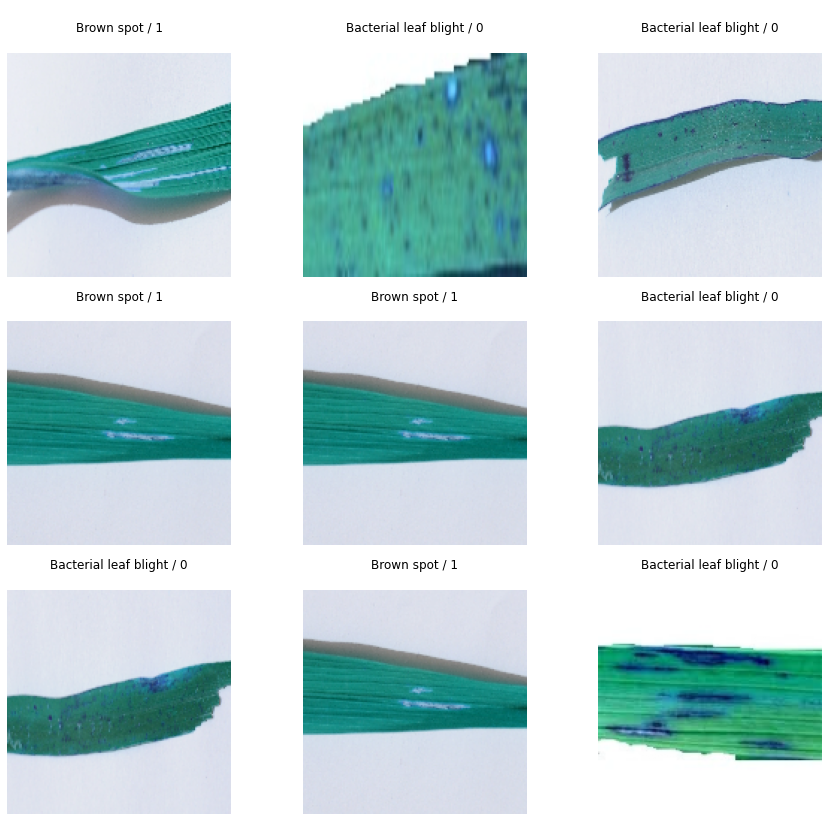

In [31]:
plt.figure(figsize=(15,14))
j=1
for i in np.random.randint(0,8,9):
  plt.subplot(3,3,j);j+=1
  plt.imshow(X_train_scaled[i])
  plt.axis("off")
  plt.title('\n{} / {}\n'.format(class_labels[np.argmax(y_categorical_train[i])],np.argmax(y_categorical_train[i])))

# Image Augmentation

In [32]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=45,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

datagen.fit(X_train_scaled)

# Model trainning

In [33]:
r=model.fit_generator(datagen.flow(X_train_scaled,y_categorical_train, batch_size = 1),
                    steps_per_epoch = len(X_train_scaled) / 1, # number of samples per gradient update
                    epochs = 300, # number of iterations
                    validation_data= (X_test_scaled,y_cat_test),
                    callbacks=[callback],
                    verbose=1,shuffle=False)

Epoch 1/300
95/95 [==============================] - 7s 65ms/step - loss: 1.0780 - accuracy: 0.4017 - val_loss: 1.1003 - val_accuracy: 0.2083
Epoch 2/300
95/95 [==============================] - 5s 56ms/step - loss: 1.1003 - accuracy: 0.3330 - val_loss: 1.2095 - val_accuracy: 0.2083
Epoch 3/300
95/95 [==============================] - 5s 56ms/step - loss: 1.0733 - accuracy: 0.4210 - val_loss: 1.0992 - val_accuracy: 0.3333
Epoch 4/300
95/95 [==============================] - 5s 56ms/step - loss: 1.0572 - accuracy: 0.4706 - val_loss: 1.0550 - val_accuracy: 0.4583
Epoch 5/300
95/95 [==============================] - 5s 56ms/step - loss: 1.0899 - accuracy: 0.4030 - val_loss: 1.0235 - val_accuracy: 0.5000
Epoch 6/300
95/95 [==============================] - 5s 56ms/step - loss: 0.9990 - accuracy: 0.4867 - val_loss: 0.9872 - val_accuracy: 0.6667
Epoch 7/300
95/95 [==============================] - 5s 56ms/step - loss: 1.0633 - accuracy: 0.4382 - val_loss: 1.1250 - val_accuracy: 0.2500
Epoch 

# Validation Loss Plot

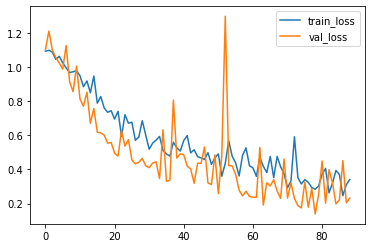

In [34]:
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

# Accuracy Plot

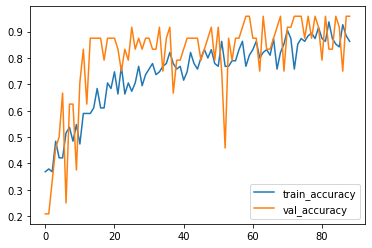

In [35]:
plt.plot(r.history['accuracy'],label='train_accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

# Model Evaluation

In [36]:
model.evaluate(X_test_scaled,y_cat_test)

1/1 [==============================] - 0s 194ms/step - loss: 0.2317 - accuracy: 0.9583


[0.23174627125263214, 0.9583333134651184]

# Classification report

In [37]:
from sklearn.metrics import classification_report
predictions = np.argmax(model.predict(X_test_scaled), axis=-1)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      1.00      1.00        13
           2       1.00      0.80      0.89         5

    accuracy                           0.96        24
   macro avg       0.95      0.93      0.94        24
weighted avg       0.96      0.96      0.96        24



In [38]:
print(f"Predicted Class : {predictions}\n")
print(f"Test Images Class : {y_test}")

Predicted Class : [2 1 1 1 0 0 1 0 1 1 1 2 1 1 0 0 2 1 1 0 1 0 2 1]

Test Images Class : [2 1 1 1 2 0 1 0 1 1 1 2 1 1 0 0 2 1 1 0 1 0 2 1]


In [39]:
#model.save('riceleaf_disease_prediction')


In [40]:
from keras.models import load_model
#model3 = load_model('riceleaf_79')

# Confusion Matrix

<Figure size 432x288 with 0 Axes>

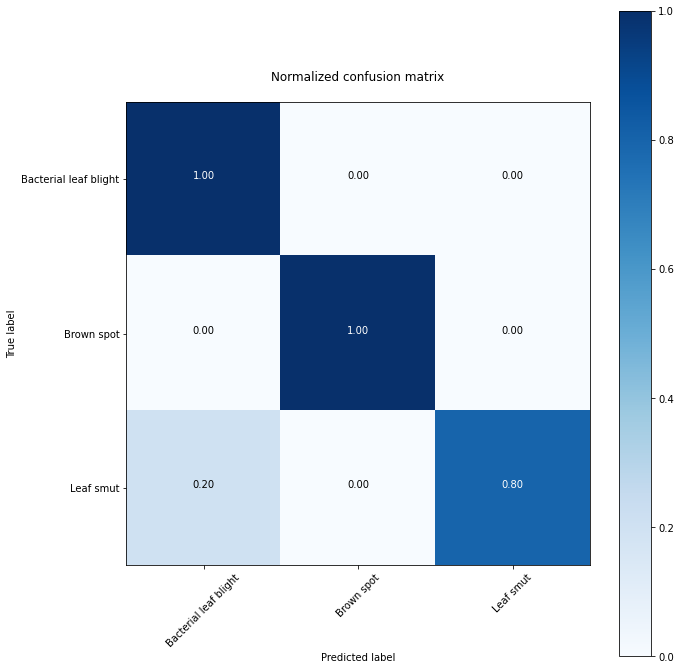

In [41]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_labels, title='Normalized confusion matrix\n')
plt.show()
